In [8]:
import matplotlib.pyplot as plt
import numpy as np
mean1 = np.array([0, 0])
cov1 = np.eye(2, 2)
mean2 = np.array([4, 5])
cov2 = np.eye(2, 2)


In [9]:
a = np.random.multivariate_normal(mean1, cov1, (50, 1))
b = np.random.multivariate_normal(mean2, cov2, (50, 1))
trainingdata = np.append(a, b)
trainingdata = trainingdata.reshape(100, 2)
traininglabels = np.append([-1 for i in range(50)], np.ones(50))
traininglabels = traininglabels.reshape(100, 1)
trainingdata = np.append(trainingdata, traininglabels, axis=1)
trainingdata = np.insert(trainingdata, 0, 1, axis=1)


In [10]:
a = np.random.multivariate_normal(mean1, cov1, (25, 1))
b = np.random.multivariate_normal(mean2, cov2, (25, 1))
testdata = np.append(a, b)
testdata = testdata.reshape(50, 2)
testlabels = np.append([-1 for i in range(25)], np.ones(25))
testlabels = testlabels.reshape(50, 1)
testdata = np.append(testdata, testlabels, axis=1)
testdata = np.insert(testdata, 0, 1, axis=1)


In [11]:


def gradient(alpha, iterations):
    thetha0 = 0
    thetha1 = 0
    thetha2 = 0
    for i in range(iterations):
        temp1 = 0
        temp2 = 0
        temp3 = 0
        for j in trainingdata:
            pred = 1
            if (thetha0 + thetha1 * j[1] + thetha2 * j[2]) < 0:
                pred = -1
            temp1 += (pred-j[3]) * j[0]
            temp2 += (pred - j[3]) * j[1]
            temp3 += (pred - j[3]) * j[2]
        thetha0 = thetha0 - 2*alpha * temp1
        thetha1 = thetha1 - 2*alpha * temp2
        thetha2 = thetha2 - 2*alpha * temp3
    return thetha0, thetha1, thetha2


weights = gradient(0.000001, 1000)


In [12]:
predictions = []
for i in range(len(testdata)):
    y_pred = 0
    for k in range(3):
        y_pred += weights[k]*testdata[i][k]
    if (y_pred < 0):
        predictions.append(-1)
    else:
        predictions.append(1)
print('prediction ', predictions)
accuracy = 0
for i in range(len(predictions)):
    if predictions[i] == testdata[i][3]:
        accuracy += 1
accuracy = accuracy/len(predictions)
print("test error", 100-accuracy*100, "%")


prediction  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test error 0.0 %


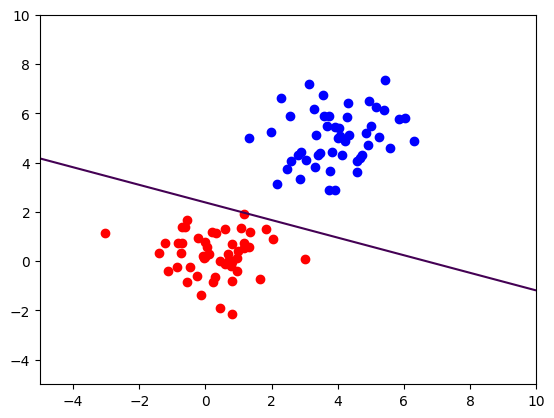

In [13]:
x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
Z = weights[0] + weights[1]*X + weights[2]*Y
plt.contour(X, Y, Z, [0])
plt.scatter(trainingdata[0:50, 1], trainingdata[0:50, 2], c='r')
plt.scatter(trainingdata[50:100, 1], trainingdata[50:100, 2], c='b')
plt.show()
